<a href="https://colab.research.google.com/github/konkall/Fake_News_detection/blob/main/FakeNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fake News Detection

Fake news is false or misleading information presented as news and often has the aim of damaging the reputation of a person or entity, or making money through advertising revenue. 

In this project we will try to successfully discern fake news by using classification techniques. This process is divided into four major tasks: Preprocessing, Data overview, Feature extraction, and Classification.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Import Libraries

In [ ]:
# For large and multi-dimensional arrays
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

# For data manipulation and analysis
import pandas as pd
pd.options.mode.chained_assignment = None

# For data vizualization 
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download(u'stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
#Word Tokenization
from nltk import word_tokenize
# the corpus reader wordnet is imported.
from nltk.corpus import wordnet as wn
# WordNetLemmatizer is imported from wordnet.
from nltk.stem.wordnet import WordNetLemmatizer
# Parts of speech tag are imported from nltk.
from nltk import pos_tag
# Default Dictionary is imported from collections.
from collections import defaultdict

from sklearn.model_selection import train_test_split

#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
import gensim
from gensim.models import Word2Vec

# For feature processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

# Best parameters for SVM
from sklearn.model_selection import GridSearchCV

# Evaluation metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


%matplotlib inline

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


#Load Dataset

In [ ]:
location_data = r'/content/gdrive/MyDrive/DataMining/Εργασίες/Fake News detection/data/' 
location_fake = r'/content/gdrive/MyDrive/DataMining/Εργασίες/Fake News detection/data/Fake.csv' 
location_true = r'/content/gdrive/MyDrive/DataMining/Εργασίες/Fake News detection/data/True.csv' 

df_fake = pd.read_csv(location_fake)
df_fake.info()
display(df_fake.head())

df_true = pd.read_csv(location_true)
df_true.info()
display(df_true.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


#Preprocessing

Preprocessing is a crucial step for data mining because through it we transform transforming raw data into an understandable format.

Whate we do below is removing NaN rows and lemmatizing every word that is not a stopword or punctuation.

In [ ]:
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

stopwords = gensim.parsing.preprocessing.STOPWORDS
lemmatizer = WordNetLemmatizer()

def preprocess(description):
  #Convert to lower case and Tokenize Sentence 
  tokens = word_tokenize(description.lower())

  #Lemmatization of tokens that are not stopwords or punctuation
  tokens = [lemmatizer.lemmatize(token, tag_map[tag[0]]) for token, tag in pos_tag(tokens) if (token not in stopwords and token.isalnum() == True and len(token)>2)]

  return ' '.join(tokens)

In [ ]:
#Preprocessing of fake news dataset
df_fake['title'] = df_fake['title'].apply(preprocess)
df_fake['text'] = df_fake['text'].apply(preprocess)
df_fake = df_fake[~df_fake.text.isna() & ~df_fake.title.isna()]

display(df_fake.head())

#Since the preprocessing of the data takes a while, we want our preprocessed data stored in a CSV file.
df_fake.to_csv(location_data+'fake_preprocessed', index=False)

,title,text,subject,date
0,donald trump send embarrass new year eve messa...,donald trump couldn wish americans happy new y...,News,"December 31, 2017"
1,drunk brag trump staffer start russian collusi...,house intelligence committee chairman devin nu...,News,"December 31, 2017"
2,sheriff david clarke internet joke threaten po...,friday reveal milwaukee sheriff david clarke c...,News,"December 30, 2017"
3,trump obsess obama cod website image,christmas day donald trump announce work follo...,News,"December 29, 2017"
4,pope francis donald trump christmas speech,pope francis annual christmas day message rebu...,News,"December 25, 2017"


In [ ]:
#Preprocessing of true news dataset
df_true['title'] = df_true['title'].apply(preprocess)
df_true['text'] = df_true['text'].apply(preprocess)
df_true = df_true[~df_true.text.isna() & ~df_true.title.isna()]

display(df_true.head())

#Since the preprocessing of the data takes a while, we want our preprocessed data stored in a CSV file.
df_true.to_csv(location_data+'true_preprocessed', index=False)

,title,text,subject,date
0,budget fight loom republican flip fiscal script,washington reuters head conservative republica...,politicsNews,"December 31, 2017"
1,military accept transgender recruit monday pen...,washington reuters transgender people allow ti...,politicsNews,"December 29, 2017"
2,senior republican senator mueller job,washington reuters special counsel investigati...,politicsNews,"December 31, 2017"
3,fbi russia probe help australian diplomat nyt,washington reuters trump campaign adviser geor...,politicsNews,"December 30, 2017"
4,trump want postal service charge amazon shipment,reuters president donald trump postal service ...,politicsNews,"December 29, 2017"


#Data Overview

Data overview and visualization is a really important step because it allows us to identify underlying patterns in the dataset, outliers and data subsets of interest.

##Title Visualization

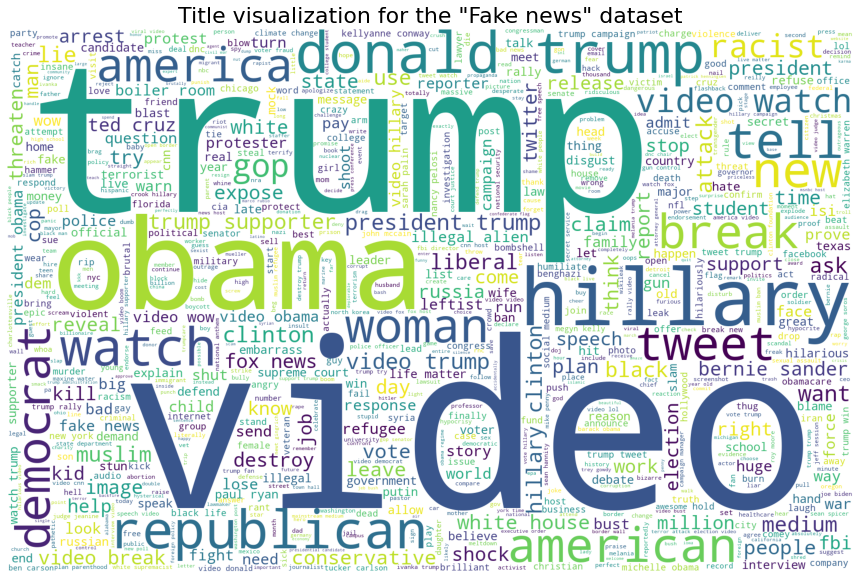

In [ ]:
wordcloud = WordCloud(max_words=800,width=1680, height=1080, background_color="white").generate(' '.join(df_fake['title'].tolist()))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Title visualization for the "Fake news" dataset', fontsize = 22)
plt.show()

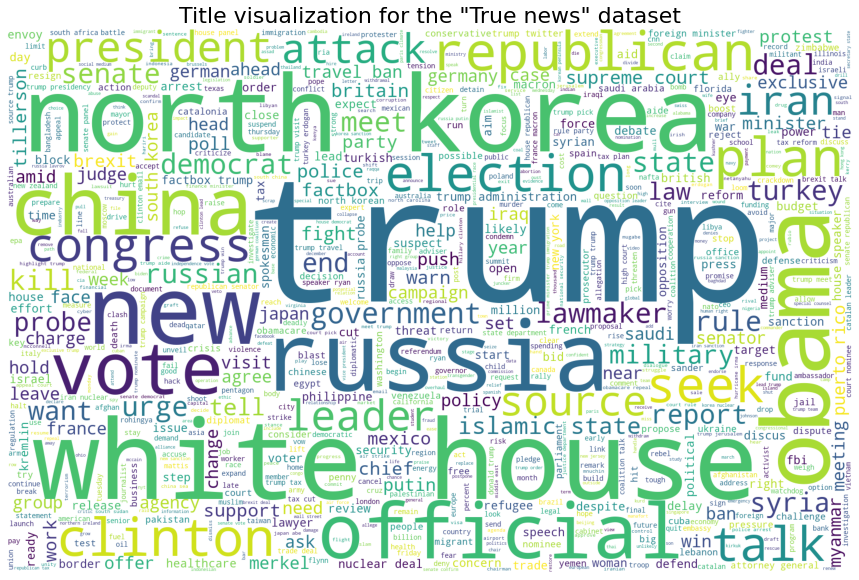

In [ ]:
wordcloud = WordCloud(max_words=800,width=1680, height=1080, background_color="white").generate(' '.join(df_true['title'].tolist()))
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Title visualization for the "True news" dataset', fontsize = 22)
plt.show()

##Average number of characters in Title and Text columns

In [ ]:
#Function to calculate the average character count
def average_char_count(df, column_name):
  count = 0

  for idx, row in df.iterrows():
    count += len(row[column_name])

  return count/len(df.index)

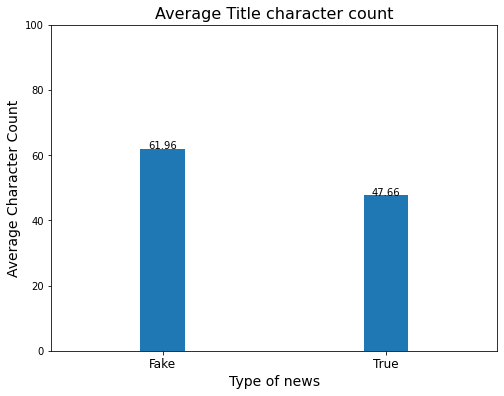

In [ ]:
dataset = ['Fake', 'True']
avg_count = [round(average_char_count(df_fake, 'title'), 2), round(average_char_count(df_true, 'title'), 2)]

plt.figure(figsize=(8,6))

axes = plt.gca()
axes.set_xlim([-0.5,1.5])
axes.set_ylim([0,100])

plt.bar(dataset, avg_count, width=0.2)
for idx, count in enumerate(avg_count):
    plt.text(idx, count, str(count), horizontalalignment='center')
plt.title('Average Title character count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Type of news', fontsize = 14)
plt.ylabel('Average Character Count', fontsize = 14)

plt.show()

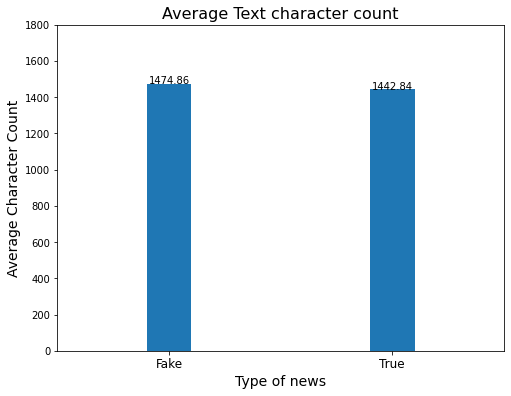

In [ ]:
dataset = ['Fake', 'True']
avg_count = [round(average_char_count(df_fake, 'text'), 2), round(average_char_count(df_true, 'text'), 2)]

plt.figure(figsize=(8,6))

axes = plt.gca()
axes.set_xlim([-0.5,1.5])
axes.set_ylim([0,1800])

plt.bar(dataset, avg_count, width=0.2)
for idx, count in enumerate(avg_count):
    plt.text(idx, count, str(count), horizontalalignment='center')
plt.title('Average Text character count', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Type of news', fontsize = 14)
plt.ylabel('Average Character Count', fontsize = 14)

plt.show()

##Distribution of the number of words in Title and Text columns

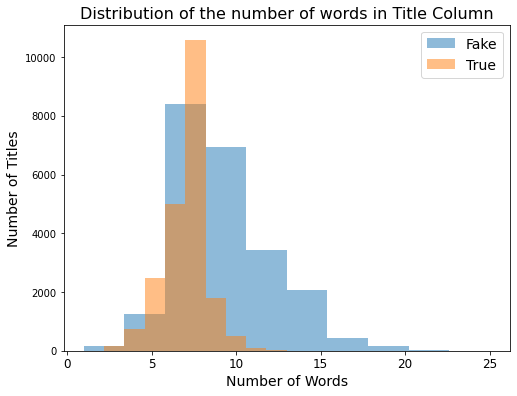

In [ ]:
series_fake = df_fake.title.str.split()
series_true = df_true.title.str.split()

word_count_fake = []
word_count_true = []

for idx, row in series_fake.iteritems():
  word_count_fake.append(len(row))

for idx, row in series_true.iteritems():
  word_count_true.append(len(row))


plt.figure(figsize=(8,6))
plt.hist(word_count_fake, alpha=0.5, label='Fake')
plt.hist(word_count_true, alpha=0.5, label='True')
plt.legend(loc='upper right', fontsize = 14)
plt.title('Distribution of the number of words in Title Column', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Number of Words', fontsize = 14)
plt.ylabel('Number of Titles', fontsize = 14)

plt.show()

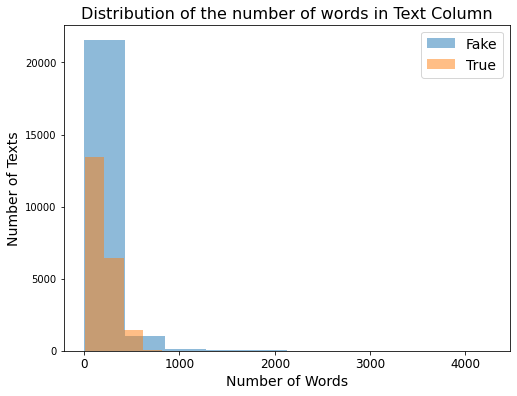

In [ ]:
series_fake = df_fake.text.str.split()
series_true = df_true.text.str.split()

word_count_fake = []
word_count_true = []

for idx, row in series_fake.iteritems():
  word_count_fake.append(len(row))

for idx, row in series_true.iteritems():
  word_count_true.append(len(row))


plt.figure(figsize=(8,6))
plt.hist(word_count_fake, alpha=0.5, label='Fake')
plt.hist(word_count_true, alpha=0.5, label='True')
plt.legend(loc='upper right', fontsize = 14)
plt.title('Distribution of the number of words in Text Column', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Number of Words', fontsize = 14)
plt.ylabel('Number of Texts', fontsize = 14)

plt.show()

##Most common Bigrams for Title and Text columns

In [ ]:
#function that returns the most common bigrams
def common_bigrams(df, column, N=20):
  word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word', max_features = N)
  sparse_matrix = word_vectorizer.fit_transform(df[column])
  frequencies = sum(sparse_matrix).toarray()[0]
  bigrams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])
  
  return bigrams_df.sort_values(by='frequency', ascending=False)[:N]


###Most common Title bigrams for true and fake news

In [ ]:
df_fake_bigrams = common_bigrams(df_fake, 'title', N=20)
df_true_bigrams = common_bigrams(df_true, 'title', N=20)

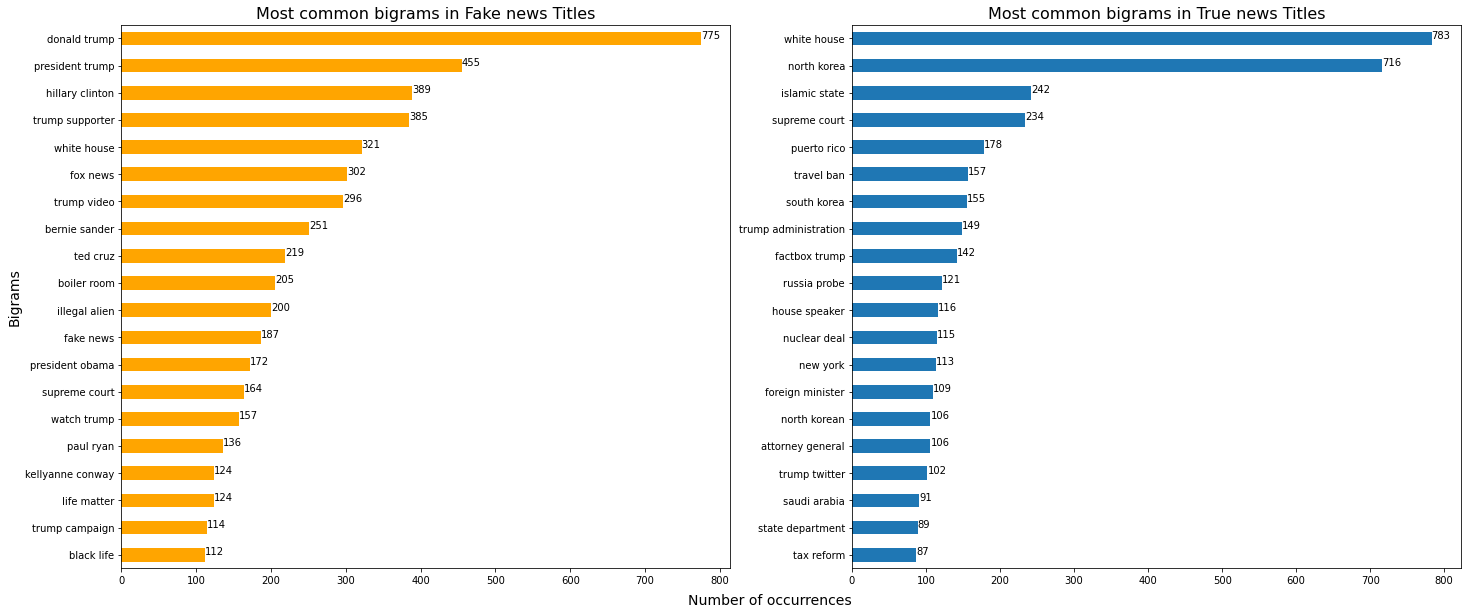

In [ ]:
fig = plt.figure(figsize = (30, 18))

#Fake news bigrams barh
ax = fig.add_subplot(1, 2, 1)

df_fake_bigrams.sort_values(by='frequency', ascending=True).plot.barh( legend=None, figsize = (24,10), color='orange', ax=ax)
for idx, value in enumerate(list(df_fake_bigrams['frequency'].sort_values(ascending=True))):
    plt.text(value, idx, str(value), horizontalalignment='left')
ax.set_title('Most common bigrams in Fake news Titles', fontsize = 16)
#ax.set_xlabel('Number of occurrences', fontsize = 14)
ax.set_ylabel('Bigrams', fontsize = 14)


#True news bigrams barh
ax = fig.add_subplot(1, 2, 2)

df_true_bigrams.sort_values(by='frequency', ascending=True).plot.barh( legend=None, figsize = (24,10), ax=ax)
for idx, value in enumerate(list(df_true_bigrams['frequency'].sort_values(ascending=True))):
    plt.text(value, idx, str(value), horizontalalignment='left')
ax.set_title('Most common bigrams in True news Titles', fontsize = 16)


fig.text(0.5, 0.08,'Number of occurrences', va='center', ha='center', fontsize=14)

plt.show()

###Most common Text bigrams for true and fake news

In [ ]:
df_fake_bigrams = common_bigrams(df_fake, 'text', N=20)
df_true_bigrams = common_bigrams(df_true, 'text', N=20)

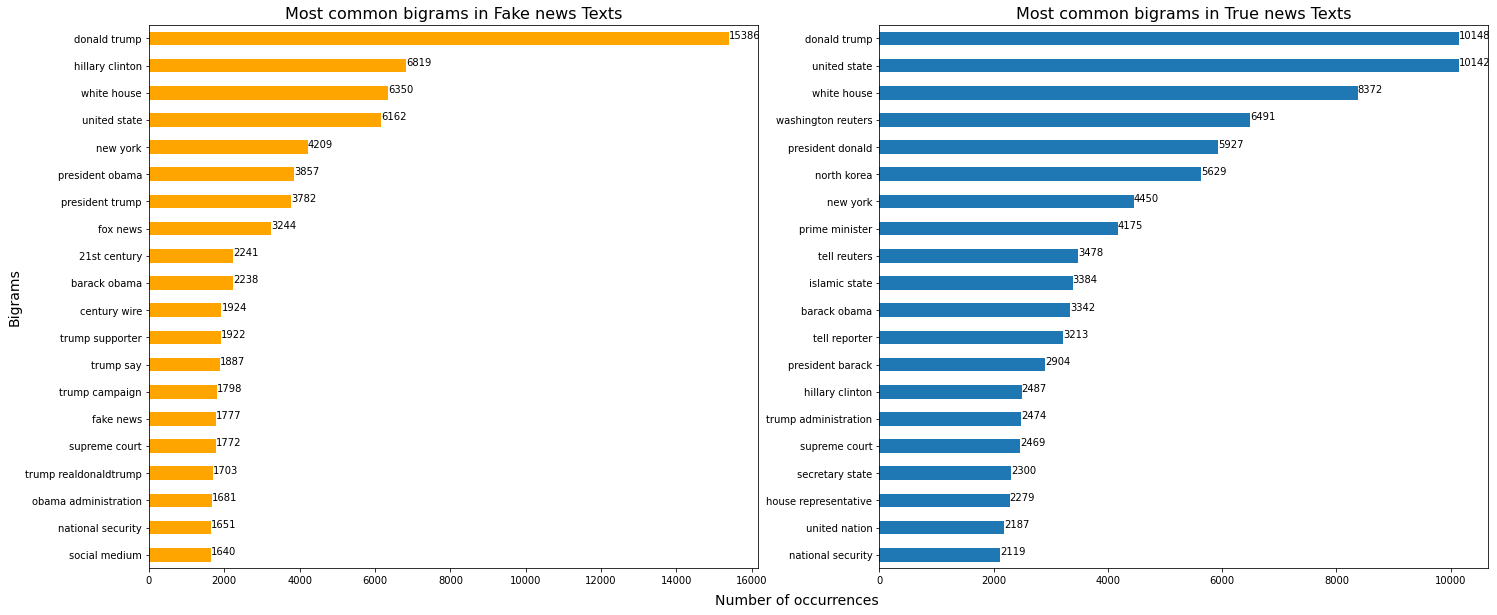

In [ ]:
fig = plt.figure(figsize = (30, 18))

#Fake news bigrams barh
ax = fig.add_subplot(1, 2, 1)

df_fake_bigrams.sort_values(by='frequency', ascending=True).plot.barh( legend=None, figsize = (24,10), color='orange', ax=ax)
for idx, value in enumerate(list(df_fake_bigrams['frequency'].sort_values(ascending=True))):
    plt.text(value, idx, str(value), horizontalalignment='left')
ax.set_title('Most common bigrams in Fake news Texts', fontsize = 16)
#ax.set_xlabel('Number of occurrences', fontsize = 14)
ax.set_ylabel('Bigrams', fontsize = 14)


#True news bigrams barh
ax = fig.add_subplot(1, 2, 2)

df_true_bigrams.sort_values(by='frequency', ascending=True).plot.barh( legend=None, figsize = (24,10), ax=ax)
for idx, value in enumerate(list(df_true_bigrams['frequency'].sort_values(ascending=True))):
    plt.text(value, idx, str(value), horizontalalignment='left')
ax.set_title('Most common bigrams in True news Texts', fontsize = 16)


fig.text(0.5, 0.08,'Number of occurrences', va='center', ha='center', fontsize=14)

plt.show()

#Creating Training dataset

In [ ]:
df_fake['label'] = 0
df_true['label'] = 1

#Appending the two dataframes together
df_combined = df_fake
df_combined = df_combined.append(df_true)

#Rearranging their rows in a random order
df_combined = df_combined.sample(frac=1).reset_index(drop=True)

#Creating a new column that has 'title', 'text' and 'subject' columns combined
df_combined['data'] = df_combined['title'] + ' ' + df_combined['text'] + ' ' + df_combined['subject']

#Keeping a smaller subset
df_combined_sub = df_combined[:5000]

# Split dataframe to train and test sets
df_train, df_test, train_label, test_label = train_test_split(df_combined.drop(columns = ['label']), df_combined['label'], 
                                                          random_state=10, 
                                                          test_size=0.2)

#We will keep the train/test labels as NUmpy arrays
train_label = np.asarray(train_label)
test_label = np.asarray(test_label)


#Representation / Feature Extraction
Since algorithms are not able to understand 'human' language, we need to convert our data into a numeric representation. In this project we will use the Bag of Words (BoW), TF-IDF (Term Frequency - Inverse Document Frequency) and Word2Vec representations.

##Bag of Words

In [ ]:
bow_vectorizer = CountVectorizer(ngram_range=(1, 2), max_df=0.80, min_df=0.05, stop_words='english')

bow_train = bow_vectorizer.fit_transform(df_train['data'])
print(bow_train.shape)

bow_vectorizer.fit(df_train['data'])
bow_test = bow_vectorizer.transform(df_test['data'])
print(bow_test.shape)

(35410, 585)
(8853, 585)


##TF-IDF

In [ ]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_df=0.80, min_df=0.05, stop_words='english')

tfidf_train = tfidf_vectorizer.fit_transform(df_train['data'])
print(tfidf_train.shape)

tfidf_vectorizer.fit(df_train['data'])
tfidf_test = tfidf_vectorizer.transform(df_test['data'])
print(tfidf_test.shape)

(35410, 585)
(8853, 585)


##Word2Vec

In [ ]:
def w2v_vector_avg(data, w2v_model, vector_size = 600):

  # Initialize numpy array to have vector_size for each sentece in 'data' list
  w2v_vector_avg = np.zeros(shape = (len(data), vector_size))

  for i, tokens in enumerate(data):
    vector = np.zeros(vector_size).reshape((1, vector_size))
    count = 0
    for j, word in enumerate(tokens):
        try:
          vector += w2v_model.wv[word].reshape((1, vector_size))
          count += 1
        except KeyError: # handling the case where the token is not in vocabulary
          continue
    # Get the mean of vector
    if count != 0:
      vector /= count
    w2v_representation[i,:] = vector

  return w2v_vector_avg

Word2Vec representation for the train and test datasets

In [ ]:
#Tokenization
train_tokens = df_train.data.str.split()
test_tokens = df_test.data.str.split()

w2v_model = Word2Vec(train_tokens, size=600, window=20)

w2v_train = w2v_representation(train_tokens, w2v_model, 600)
print(w2v_train.shape)

w2v_test = w2v_representation(test_tokens, w2v_model, 600)
print(w2v_test.shape)

(35410, 600)
(8853, 600)


#Feature Scaling
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.

In [ ]:
def Standard_Scaler(train_data, test_data):
  " takes 2 dense arrays one for train data and one for test data and returns standarized train and test data "
  scaler = StandardScaler().fit(train_data)
  train_data = scaler.transform(train_data)
  test_data = scaler.transform(test_data)
  return train_data, test_data


def MaxAbs_Scaler(train_data, test_data):
  transformer = MaxAbsScaler().fit(train_data)
  scaled_train = transformer.transform(train_data)
  scaled_test = transformer.transform(test_data)
  return scaled_train, scaled_test

In [ ]:
#Bag of Words feature Scaling
bow_train, bow_test = MaxAbs_Scaler(bow_train, bow_test)

#TF-IDF feature Scaling
tfidf_train, tfidf_test = MaxAbs_Scaler(tfidf_train, tfidf_test)

#Word2Vec feature Scaling
w2v_train, w2v_test = Standard_Scaler(w2v_train, w2v_test)

#Classification and Result Evaluation

For classification we are going to use the following classifiers:
* Logistic Regression
* Naive Bayes
* Support Vector Machines (SVM)
* Random Forests

In order to evaluate the performance of our algorithms we will use the following evaluation metrics:

* **Accuracy score**: The fraction of the predictions the classifier got right.
* **F1 score**:  The harmonic mean of precision and recall. As a reminder, precision is the fraction of retrieved documents that are relevant to the query and recall is the fraction of the relevant documents that are successfully retrieved.

###Logistic Regression
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.

####Bag-of-Words

In [ ]:
lreg_model = LogisticRegression()
lreg_model.fit(bow_train, train_label)

accuracy = lreg_model.score(bow_test, test_label)
print("Accuracy = ", accuracy * 100, "%")

f1 = f1_score(test_label, lreg_model.predict(bow_test), average='macro')
print("F1 score = ", f1 * 100, "%")

Accuracy =  100.0 %
F1 score =  100.0 %


####TF-IDF

In [ ]:
lreg_model = LogisticRegression()
lreg_model.fit(tfidf_train, train_label) # training the model

accuracy = lreg_model.score(tfidf_test, test_label)
print("Accuracy = ", accuracy * 100, "%")

f1 = f1_score(test_label, lreg_model.predict(tfidf_test), average='macro')
print("F1 score = ", f1 * 100, "%")

Accuracy =  99.92093075793517 %
F1 score =  99.92087452906134 %


####Word2Vec

In [ ]:
lreg_model = LogisticRegression(max_iter=500)
lreg_model.fit(w2v_train, train_label) # training the model

accuracy = lreg_model.score(w2v_test, test_label)
print("Accuracy = ", accuracy * 100, "%")

f1 = f1_score(test_label, lreg_model.predict(w2v_test), average='macro')
print("F1 score = ", f1 * 100, "%")

Accuracy =  99.71760984976844 %
F1 score =  99.71739868377311 %


###Naive Bayes
Naive Bayes is a simple learning algorithm that utilizes Bayes rule together with a strong assumption that the attributes are conditionally independent, given the class. While this independence assumption is often violated in practice, naïve Bayes nonetheless often delivers competitive classification accuracy. Coupled with its computational efficiency and many other desirable features, this leads to naïve Bayes being widely applied in practice.

####Bag-of-Words

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(bow_train, train_label) 

accuracy = nb_model.score(bow_test, test_label)
print("Accuracy = ", accuracy * 100, "%")

prediction = nb_model.predict(bow_test)
f1 = f1_score(test_label, prediction, average='macro')
print("F1 score = ", f1 * 100, "%")

Accuracy =  99.54817575962952 %
F1 score =  99.54796092233741 %


####TF-IDF

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(tfidf_train, train_label)

accuracy = nb_model.score(tfidf_test, test_label)
print("Accuracy = ", accuracy * 100, "%")

prediction = nb_model.predict(tfidf_test)
f1 = f1_score(test_label, prediction, average='macro')
print("F1 score = ", f1 * 100, "%")

Accuracy =  97.94419970631424 %
F1 score =  97.94328205641413 %


####Word2Vec

In [ ]:
nb_model = GaussianNB()
nb_model.fit(w2v_train, train_label) 

accuracy = nb_model.score(w2v_test, test_label)
print("Accuracy = ", accuracy * 100, "%")

prediction = nb_model.predict(w2v_test)
f1 = f1_score(test_label, prediction, average='macro')
print("F1 score = ", f1 * 100, "%")

Accuracy =  92.18344064159042 %
F1 score =  92.17940928937087 %


###Support Vector Machine (SVM)
A support vector machine (SVM) is machine learning algorithm that analyzes data for classification and regression analysis. SVM is a supervised learning method that looks at data and sorts it into one of two categories. An SVM outputs a map of the sorted data with the margins between the two as far apart as possible.

We will find the best parameters for SVM by using GridSearchCV.

In [ ]:
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

####Bag-of-Words

In [ ]:
svc = svm.SVC()
clf_search = GridSearchCV(svc, parameters)
clf_search.fit(bow_train, train_label)
clf_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
clf = svm.SVC(C= 1, kernel='linear')
clf.fit(bow_train, train_label)

accuracy = clf.score(bow_test, test_label)
print("Accuracy = ", accuracy * 100, "%")

prediction = clf.predict(bow_test)
f1 = f1_score(test_label, prediction, average='macro')
print("F1 score = ", f1 * 100, "%")

Accuracy =  100.0 %
F1 score =  100.0 %


####TF-IDF

In [ ]:
svc = svm.SVC()
clf_search = GridSearchCV(svc, parameters)
clf_search.fit(tfidf_train, train_label)
clf_search.best_params_

{'C': 10, 'kernel': 'linear'}

In [ ]:
clf = svm.SVC(C= 10, kernel='linear')
clf.fit(tfidf_train, train_label)

accuracy = clf.score(tfidf_test, test_label)
print("Accuracy = ", accuracy * 100, "%")

prediction = clf.predict(tfidf_test)
f1 = f1_score(test_label, prediction, average='macro')
print("F1 score = ", f1 * 100, "%")

Accuracy =  99.96611318197222 %
F1 score =  99.96608989440165 %


####Word2Vec

In [ ]:
svc = svm.SVC()
clf_search = GridSearchCV(svc, parameters)
clf_search.fit(w2v_train, train_label)
clf_search.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
clf = svm.SVC(C= 10, gamma=0.001, kernel='rbf')
clf.fit(w2v_train, train_label)

accuracy = clf.score(w2v_test, test_label)
print("Accuracy = ", accuracy * 100, "%")

prediction = clf.predict(w2v_test)
f1 = f1_score(test_label, prediction, average='macro')
print("F1 score = ", f1 * 100, "%")

Accuracy =  99.7289054557777 %
F1 score =  99.72872075888321 %


###Random Forests
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

####Bag-of-Words

In [ ]:
rf = RandomForestClassifier().fit(bow_train, train_label) 
prediction = rf.predict(bow_test)

accuracy = accuracy_score(test_label, prediction)
print("Accuracy = ", accuracy * 100, "%")

f1 = f1_score(test_label, prediction)
print("F1 score = ", f1 * 100, "%")

Accuracy =  99.96611318197222 %
F1 score =  99.96520125275488 %


####TF-IDF

In [ ]:
rf = RandomForestClassifier().fit(tfidf_train, train_label) 
prediction = rf.predict(tfidf_test)

accuracy = accuracy_score(test_label, prediction)
print("accuracy = ", accuracy * 100, "%")

f1 = f1_score(test_label, prediction)
print("F1 score = ", f1 * 100, "%")

accuracy =  99.97740878798147 %
F1 score =  99.97680352586407 %


####Word2Vec

In [ ]:
rf = RandomForestClassifier().fit(w2v_train, train_label) 
prediction = rf.predict(w2v_test)

accuracy = accuracy_score(test_label, prediction)
print("Αccuracy = ", accuracy * 100, "%")

f1 = f1_score(test_label, prediction)
print("F1 score = ", f1 * 100, "%")

Αccuracy =  98.2604766745736 %
F1 score =  98.207635009311 %


#Conclusion

|                        |          |  Bag of Words  |    TF-IDF    |   Word2Vec   |
|------------------------|----------|:--------------:|:------------:|:------------:|
|   Logistic Regression  | Accuracy |     100.0 %    |    99.92 %   |    99.71 %   |
|                        | F1 score |     100.0 %    |    99.92 %   |    99.71 %   |
|       Naive Bayes      | Accuracy |     99.54 %    |    97.94 %   |    92.18 %   |
|                        | F1 score |     99.54 %    |    97.94 %   |    92.17 %   |
| Support Vector Machine | Accuracy |     100.0 %    |    99.96 %   |    99.72 %   |
|                        | F1 score |     100.0 %    |    99.96 %   |    99.72 %   |
|     Random Forests     | Accuracy |     99.96 %    |    99.97 %   |    98.26 %   |
|                        | F1 score |     99.96 %    |    99.97 %   |    98.20 %   |

Above we can see a summary table of our accuracy/F1 score results for all classifiers and representations used. 

SVM yielded the best results and this might be due to the fact that we used GridSearchCV to find the best parameters. However, we should not overlook that in terms of execution time, SVM was by far the slowest. 

On the other hand, Naive Bayes was the classifier that returned the worst results, albeit good ones nevertheless. This is something that was expected since Naive Bayes is a relatively simple classifier, compared to the others used in this project. It should be noted that, due to this simplicity, Naive Bayes is a very fast classifier.

In regards to the representation used, we can see that BoW gave us the best results. It should be noted that we expected Word2Vec to outperform the other two representations, due to the power of word embeddings in dealing with NLP problems. This might be the case if we use pretrained word-embeddings.

In conclusion, we can safely say that we received satisfying results and that all classifiers worked relatively well for our dataset. 